<a href="https://colab.research.google.com/github/amit-kumar9766/Deeplearning.ai/blob/master/Precily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive"

 10amit.pdf
'15350654_1162928977128448_7087578000792177675_n.jpg (673×673)'
 1559629_352181414934209_8570781321062307876_n.jpg
 20170123_192124.jpg
'2.Indian Polity ---President to (2).docx.gdoc'
 AmitKr_Resume.pdf
'Autopilot-TensorFlow-master (1) (1).zip'
'Autopilot-TensorFlow-master (1).zip'
 bbc-text.csv
'BOW (1).ipynb'
 BOW.pdf
'btech marksheet.pdf'
 Classroom
'Colab Notebooks'
'Coursera KXW5GZBJ8SYZ.pdf'
'dd 001.jpg'
'How to get started with Drive.pdf'
 HumanActivityRecognition.zip
'HYDRAULIC CIRCUIT DOO4063 Model (1).pdf'
'Import data in R.docx'
'Import data in R.docx.gdoc'
'JOINS (1).docx.gdoc'
'JOINS (2).docx.gdoc'
 JOINS.docx
 JOINS.docx.gdoc
 LSTMs.ipynb
'Naive BAyes  BOW-Amit.pdf'
 Online-journalism-internship-application...edited.doc
 Probability3.wmv
'Quora insincerity (1).ipynb'
'RESUME (6).docx'
'RESUME (6).docx.gdoc'
 Reviews.csv
'Share PDF'
 Statistics.pdf
 Synopsis2.pdf
 trainquora.csv
'UES-25 (PFY) Joining Instr.pdf'
'Untitled Diagram.drawio'
'Untitled drawing.gdraw'

In [0]:
!cp "/content/drive/My Drive/bbc-text.csv" "bbc-text.csv"

In [0]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .7

In [0]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))


153


In [0]:
labels=[]
sentences=[]
with open("/content/drive/My Drive/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [0]:

train_size = int(len(labels) * training_portion)
print(train_size)
train_sentences = sentences[:train_size]
#print(train_sentences)
train_labels = labels[:train_size]

test_sentences = sentences[train_size:]
test_labels = labels[train_size:]

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

train_labels = np.array(label_tokenizer.texts_to_sequences(train_labels))
test_labels = np.array(label_tokenizer.texts_to_sequences(test_labels))


1557


In [0]:

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)


print(train_padded.shape)


(1557, 100)


In [0]:
test_padded.shape

(668, 100)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(10),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 16)           16000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 10)                1080      
_________________________________________________________________
dense_7 (Dense)              (None, 24)                264       
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 150       
Total params: 17,494
Trainable params: 17,494
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs =50
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels), verbose=2)

print("Training Complete")


Train on 1557 samples, validate on 668 samples
Epoch 1/50
1557/1557 - 4s - loss: 1.7322 - acc: 0.2254 - val_loss: 1.6535 - val_acc: 0.2380
Epoch 2/50
1557/1557 - 3s - loss: 1.6232 - acc: 0.2396 - val_loss: 1.6098 - val_acc: 0.2365
Epoch 3/50
1557/1557 - 3s - loss: 1.5790 - acc: 0.3109 - val_loss: 1.5434 - val_acc: 0.3488
Epoch 4/50
1557/1557 - 3s - loss: 1.3746 - acc: 0.4027 - val_loss: 1.3019 - val_acc: 0.3952
Epoch 5/50
1557/1557 - 3s - loss: 1.1883 - acc: 0.4412 - val_loss: 1.3062 - val_acc: 0.4057
Epoch 6/50
1557/1557 - 3s - loss: 1.1126 - acc: 0.4894 - val_loss: 1.4616 - val_acc: 0.3383
Epoch 7/50
1557/1557 - 3s - loss: 1.0580 - acc: 0.4990 - val_loss: 1.1689 - val_acc: 0.4551
Epoch 8/50
1557/1557 - 3s - loss: 0.9861 - acc: 0.4920 - val_loss: 1.1524 - val_acc: 0.4611
Epoch 9/50
1557/1557 - 3s - loss: 0.9564 - acc: 0.5401 - val_loss: 1.1509 - val_acc: 0.4386
Epoch 10/50
1557/1557 - 3s - loss: 0.9355 - acc: 0.5568 - val_loss: 1.2216 - val_acc: 0.4326
Epoch 11/50
1557/1557 - 3s - los

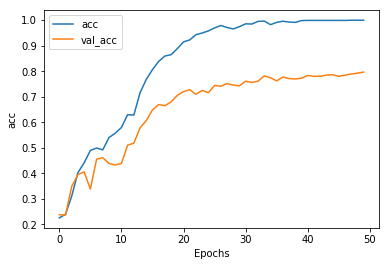

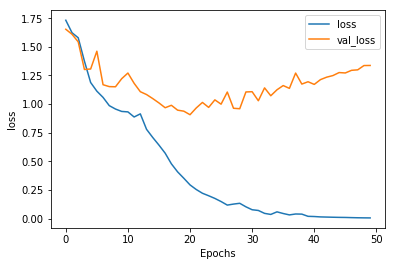

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")